<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/10/18%20Random_Forest_Prediction_w_Age_and_Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction Model for Behavior Disorder with Age, Sex, and All EEG Channels

In [56]:
import numpy as np # Linear algebra
import pandas as pd
# ModelLing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [57]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Read in data as a dataframe
data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')

In [58]:
data1.shape
data1.head(2)

,sex,age,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,1,34.16,4,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1,42.35,4,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [59]:
#Y = data1['specific_disorder']
#X = data1.loc['sex','age':'AB.A.delta.a.FP1':]
#Y

Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

X

,sex,age,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,1,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,1,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,1,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,1,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,2,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,2,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,2,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [60]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 117']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [61]:
#print(type(data2))
#print(data2.shape)

data = pd.DataFrame(data2)
X=data
#print(data.head(5))


Y
data

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1.0,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,1.0,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,1.0,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,1.0,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2.0,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,2.0,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,2.0,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,2.0,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [62]:
#come back

data.shape
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1.0,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [63]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 248)
(38, 248)
(150,)
(38,)


In [64]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print(data2)

Accuracy: 0.7105263157894737
[[ 1.       34.16     72.431249 ... 60.451504 70.739249 54.527141]
 [ 1.       42.35     19.579138 ... 54.314055 66.564799 74.223444]
 [ 1.       35.16     17.916294 ... 70.140061 77.83501  65.376514]
 ...
 [ 2.       25.66     19.464531 ... 51.581351 52.056675 58.533249]
 [ 2.       26.14     25.079005 ... 56.820057 48.688251 44.801352]
 [ 2.       29.97     21.344131 ... 44.403598 45.837304 53.373676]]


In [65]:
#prediction after fixing class imbalance
data2
from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
#X, Y = oversampler.fit_resample(data2, Y)
X = data2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(150, 248)
(38, 248)
(150,)
(38,)
Accuracy: 0.7105263157894737


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[15,  5],
       [ 6, 12]])

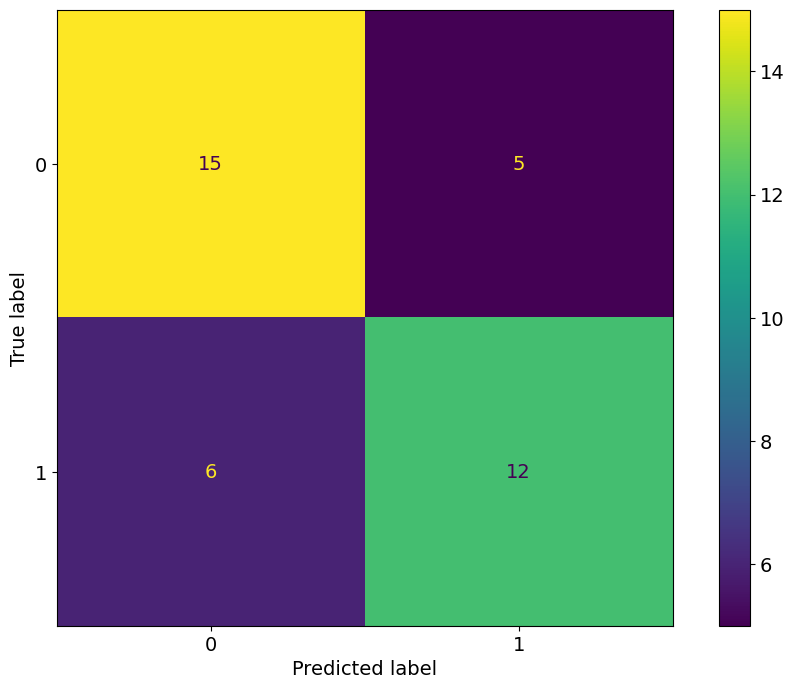

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();



Text(0.5, 709.5555555555555, 'Predicted label')

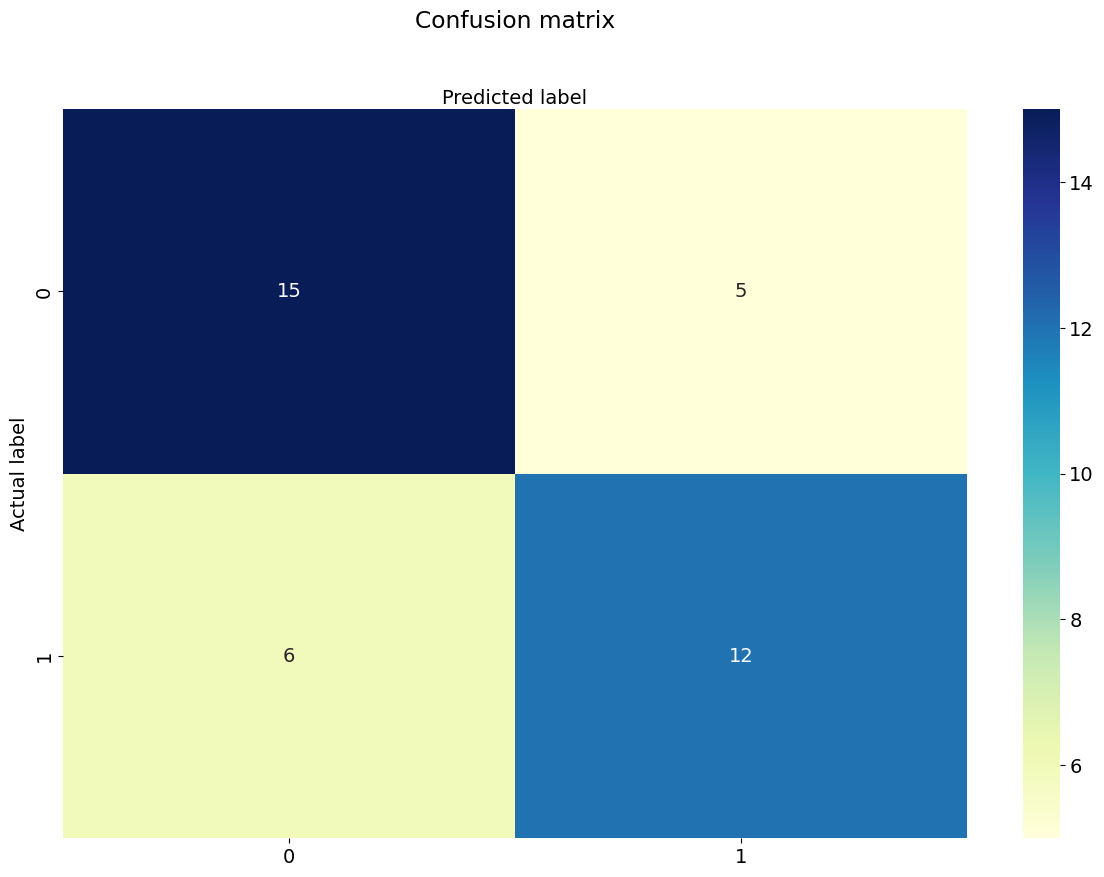

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


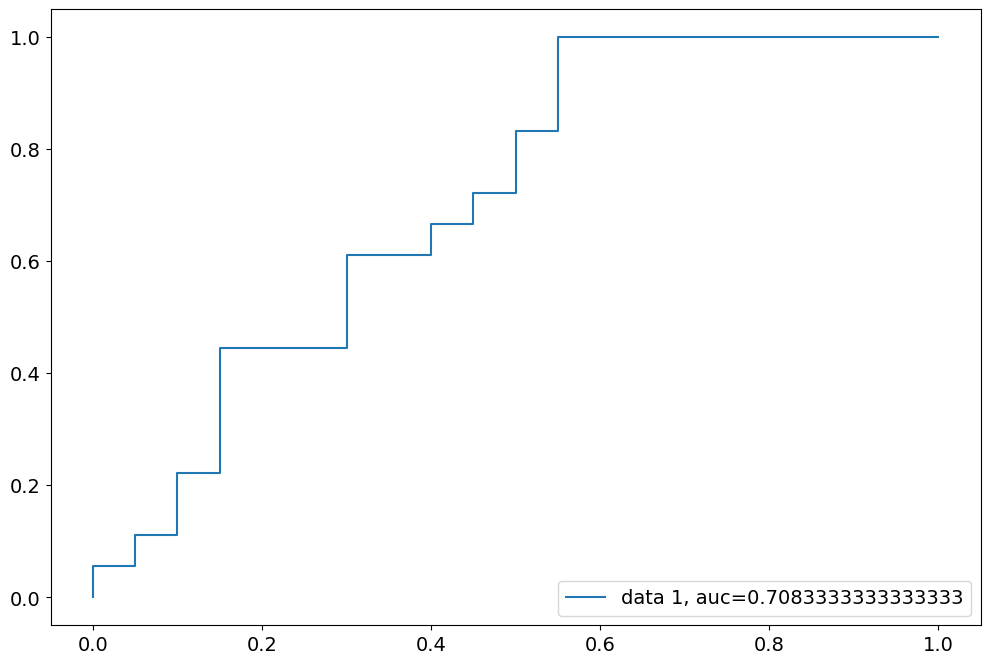

In [69]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [70]:
data

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1.0,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,1.0,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,1.0,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,1.0,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2.0,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,2.0,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,2.0,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,2.0,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


## Random Forest Feature Selection for EEG w/ age and sex


**Note:**
The first column of data contains sex(1 - female ; 2 - male), the second column constains age, the third column contains speicfic_disorder(4 - Healthy control; 5 - Behavioral addiction disorder), and all the other columns are eeg channels

     0      1          2          3          4          5          6    \
0    1.0  34.16  72.431249  69.386059  62.775437  69.193931  69.447900   
1    1.0  42.35  19.579138  19.703305  23.000027  31.034078  22.461115   
2    1.0  35.16  17.916294  22.911557  19.951421  16.835759  16.792161   
3    1.0  25.65  20.081892  17.928614  15.977752  18.119963  17.029861   
4    1.0  18.89  18.429434  26.156602  15.751990  21.654509  26.128217   
..   ...    ...        ...        ...        ...        ...        ...   
183  2.0  44.90  15.704347  16.697437  15.609133  16.450880  19.833692   
184  2.0  29.59  22.942606  23.842689  25.716234  15.901378  15.949877   
185  2.0  25.66  19.464531  33.772200   8.422497  14.893522  16.884854   
186  2.0  26.14  25.079005  17.295701  18.689557  15.510216  14.614339   
187  2.0  29.97  21.344131  16.080218  16.432277  15.770074  16.764789   

           7          8          9    ...        238        239        240  \
0    69.042085  57.324333  41.658

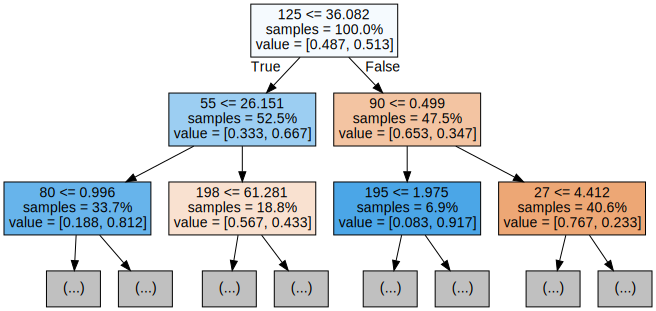

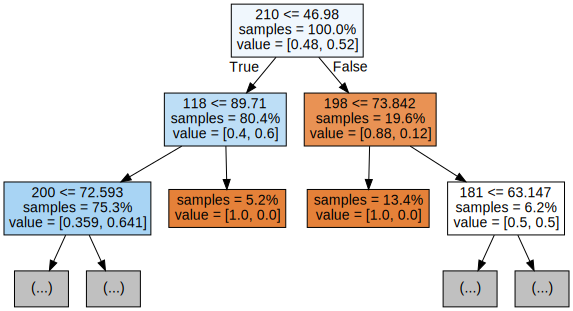

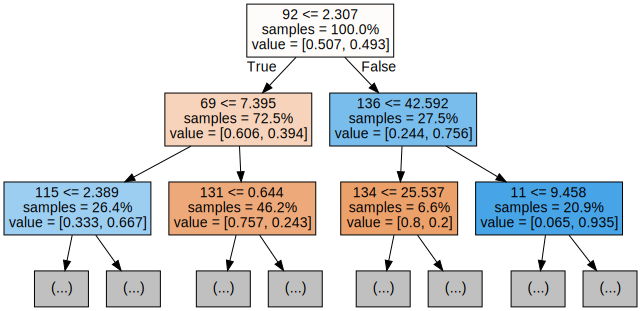

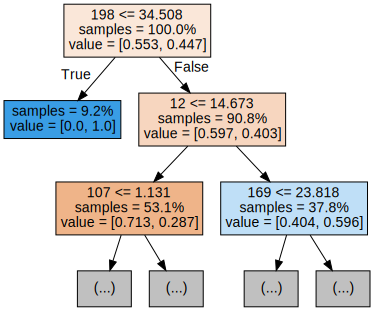

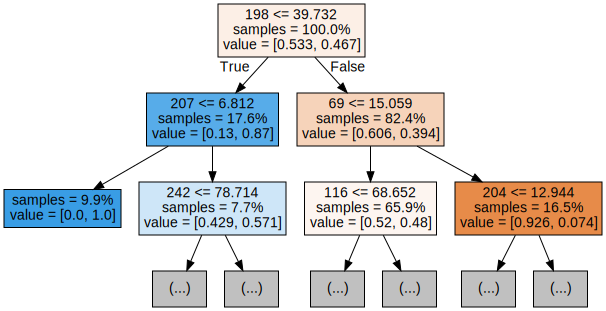

In [71]:
!pip install graphviz
# Install the necessary library
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]

# Train the random forest on the cleaned dataset
rf.fit(X_train, y_train)

print(data)
# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = data.columns.tolist(),
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



## Feature Selection Visualization



https://mljar.com/blog/feature-importance-in-random-forest/

In [72]:
!pip install shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [73]:
data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')

X = pd.DataFrame(data1.values, columns=data1.columns)
y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


     sex    age  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0      1  34.16         72.431249         69.386059        62.775437   
1      1  42.35         19.579138         19.703305        23.000027   
2      1  35.16         17.916294         22.911557        19.951421   
3      1  25.65         20.081892         17.928614        15.977752   
4      1  18.89         18.429434         26.156602        15.751990   
..   ...    ...               ...               ...              ...   
183    2  44.90         15.704347         16.697437        15.609133   
184    2  29.59         22.942606         23.842689        25.716234   
185    2  25.66         19.464531         33.772200         8.422497   
186    2  26.14         25.079005         17.295701        18.689557   
187    2  29.97         21.344131         16.080218        16.432277   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0          69.193931        69.447900        69.042085      

In [74]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
rf.feature_importances_

feature_index = X_train.columns.get_loc('COH.A.delta.f.F4.k.C4')

# Access the feature importance using the numerical index
feature_importance = rf.feature_importances_[feature_index]

# Print the feature importance
print(feature_importance)


0.10446479026216249


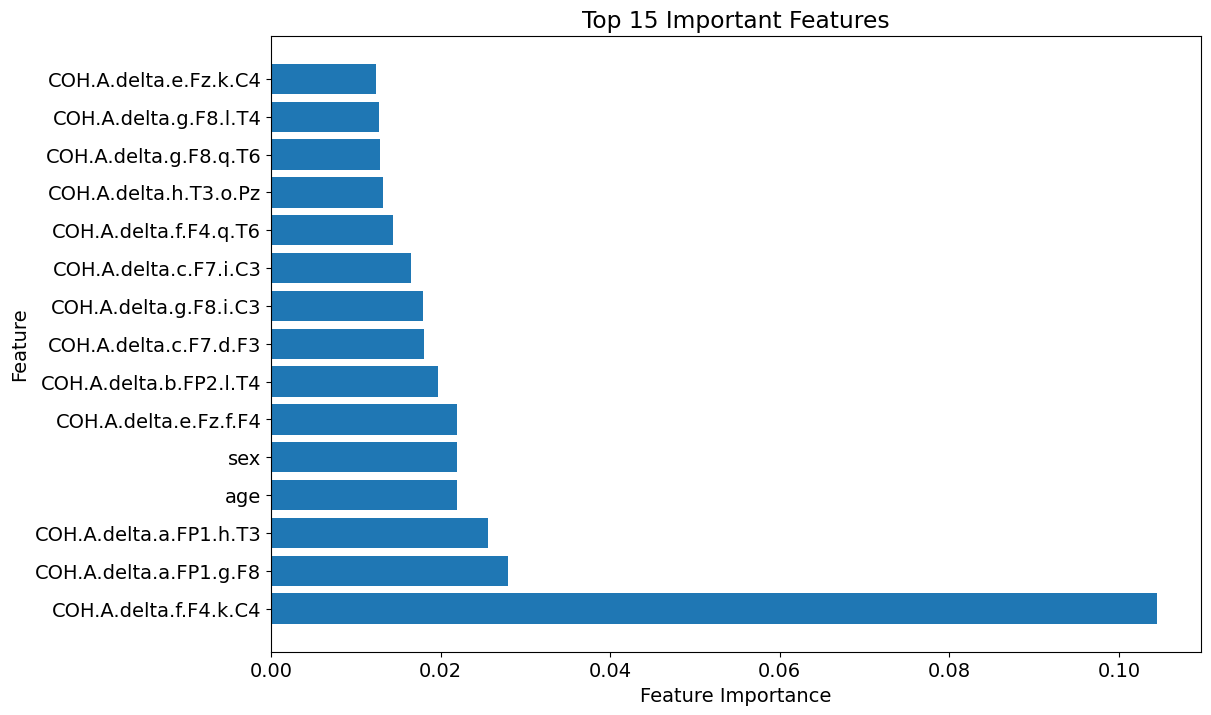

In [76]:
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select the top 15 features
top_15_features = feature_importance_df.head(15)

# Plot the top 15 features
plt.barh(top_15_features['feature'], top_15_features['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.show()

In [78]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

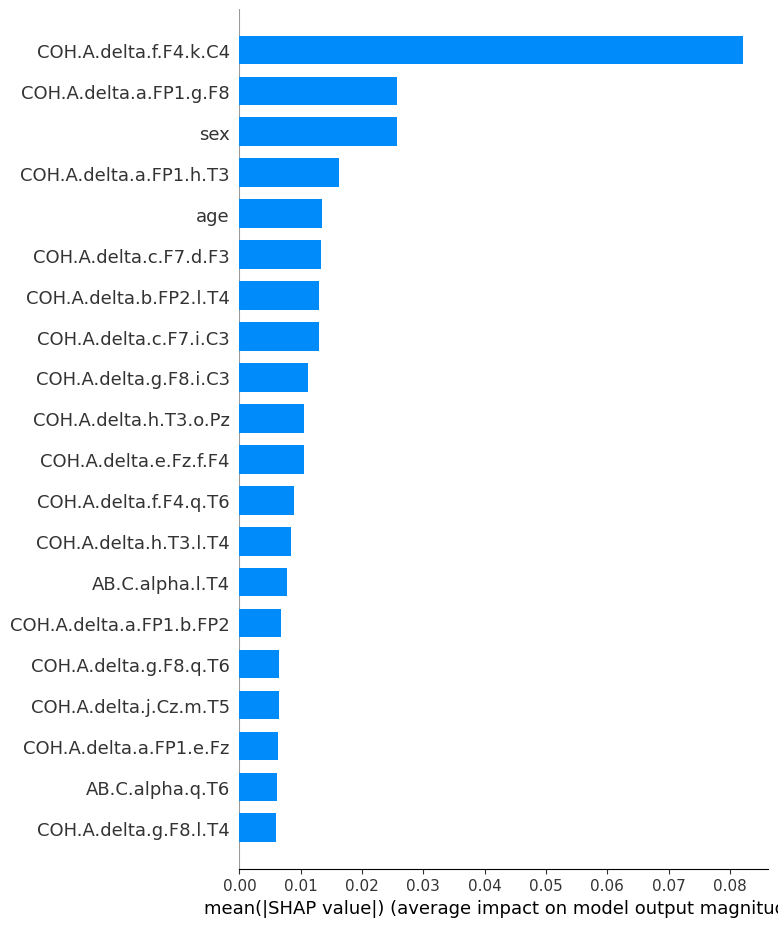

In [79]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

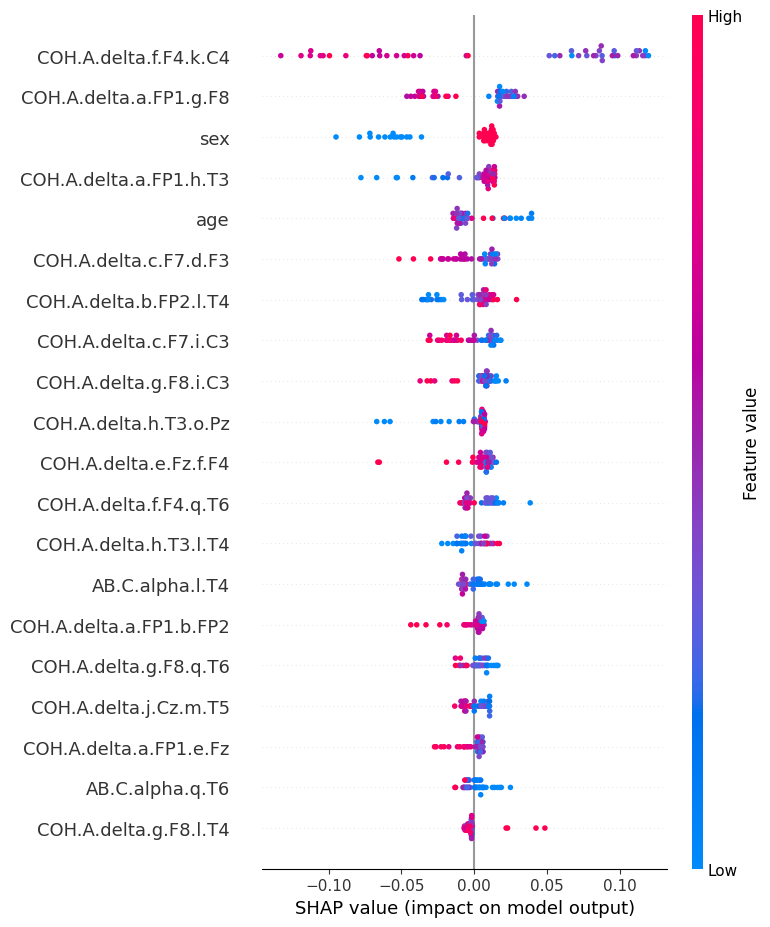

[[ 3.47549084e-03 -4.81982890e-03 -2.45659221e-03 ... -1.54143845e-04
  -8.10747907e-05  1.51532532e-04]
 [ 1.18571827e-02 -5.96325579e-03 -2.47498311e-04 ... -9.81795312e-05
  -6.81366045e-05 -1.65325299e-04]
 [ 6.56923552e-03 -6.52674597e-03 -9.24993695e-04 ... -6.91338791e-05
   3.64904799e-04 -1.03757663e-04]
 ...
 [ 6.97473005e-03 -4.43885208e-03 -1.20508879e-03 ... -1.59024891e-04
  -6.81366045e-05 -1.65325299e-04]
 [-3.62170370e-02  3.22925938e-02 -2.61924238e-03 ... -7.03141801e-05
  -2.98929529e-04  4.45821770e-04]
 [ 9.88445159e-03  2.48211756e-02 -7.28372442e-04 ... -7.26341747e-05
  -6.13922639e-05 -1.65325299e-04]]


In [80]:
shap.summary_plot(shap_values, X_test)
print(shap_values)


## Spectra Map


## Regression

COH.A.delta.f.F4.k.C4
Accuracy: 0.5789473684210527


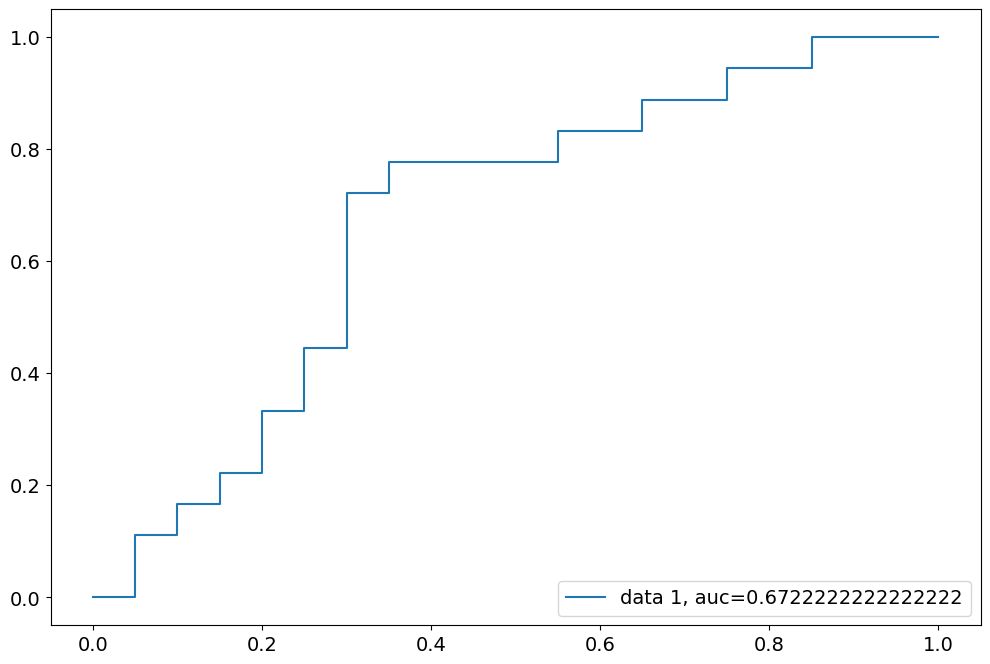

COH.A.delta.a.FP1.g.F8
Accuracy: 0.631578947368421


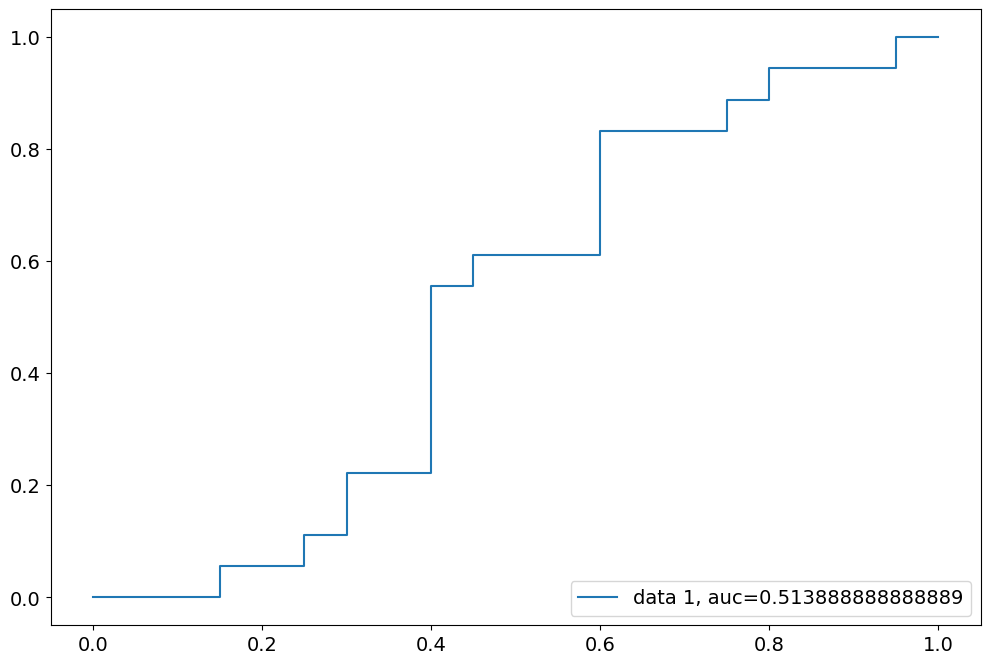

COH.A.delta.a.FP1.h.T3
Accuracy: 0.5263157894736842


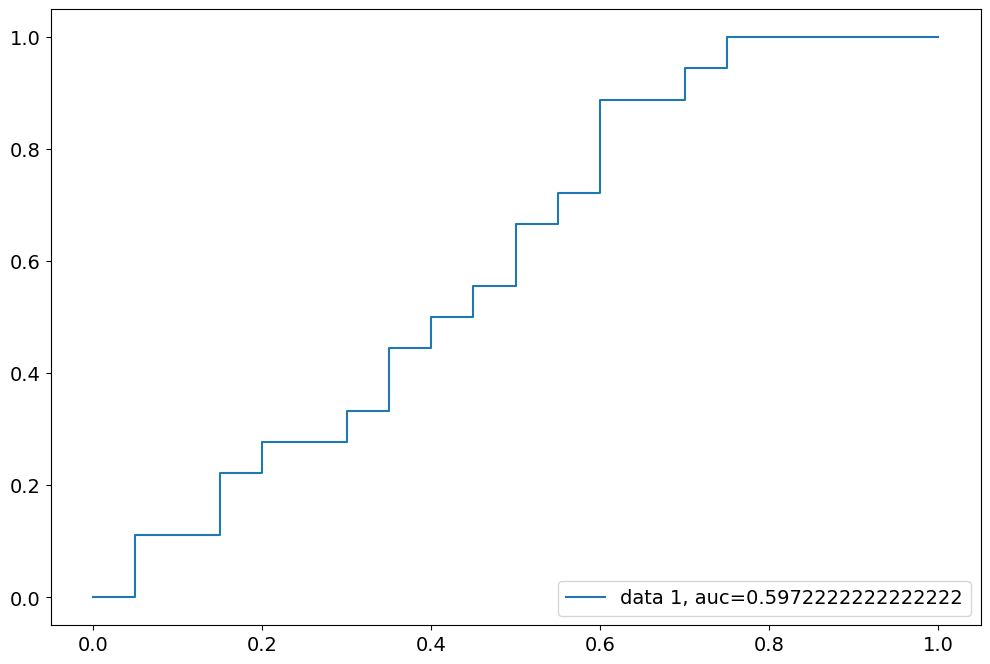

age
Accuracy: 0.7368421052631579


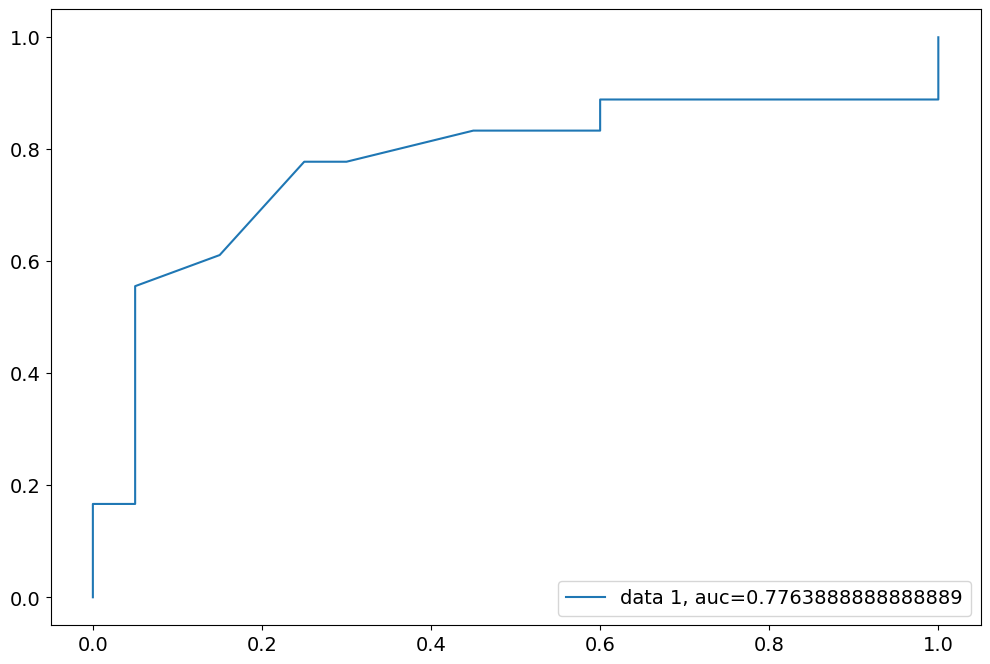

sex
Accuracy: 0.6578947368421053


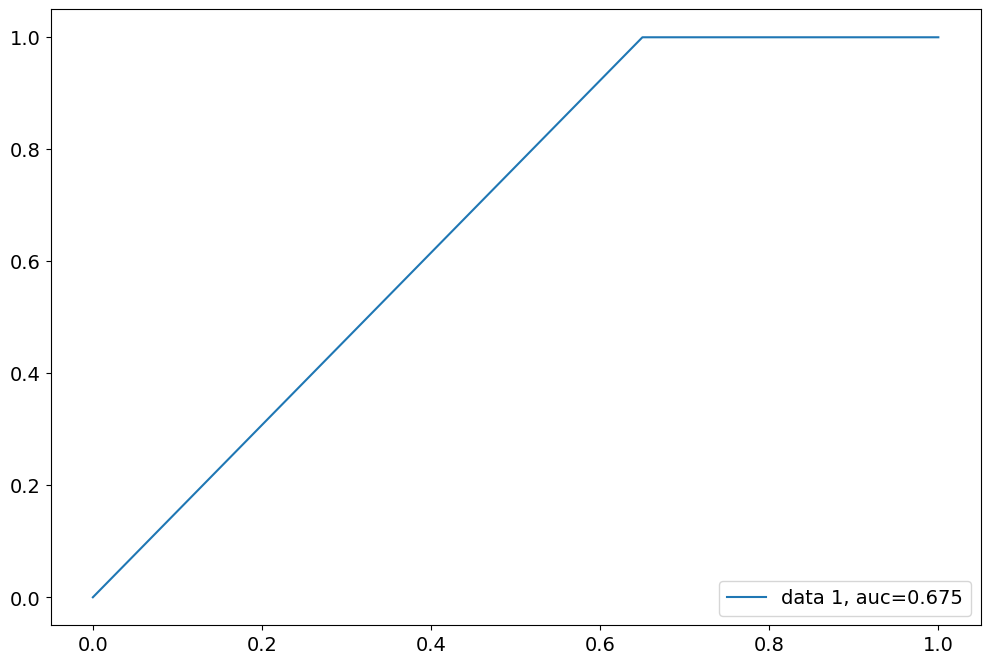

COH.A.delta.e.Fz.f.F4
Accuracy: 0.6578947368421053


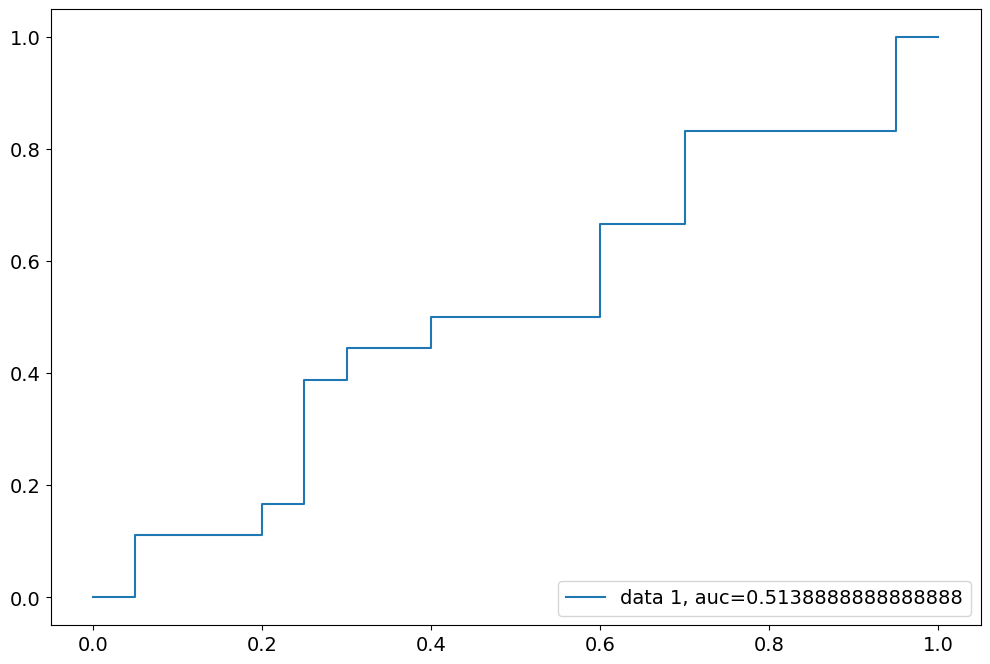

COH.A.delta.b.FP2.l.T4
Accuracy: 0.39473684210526316


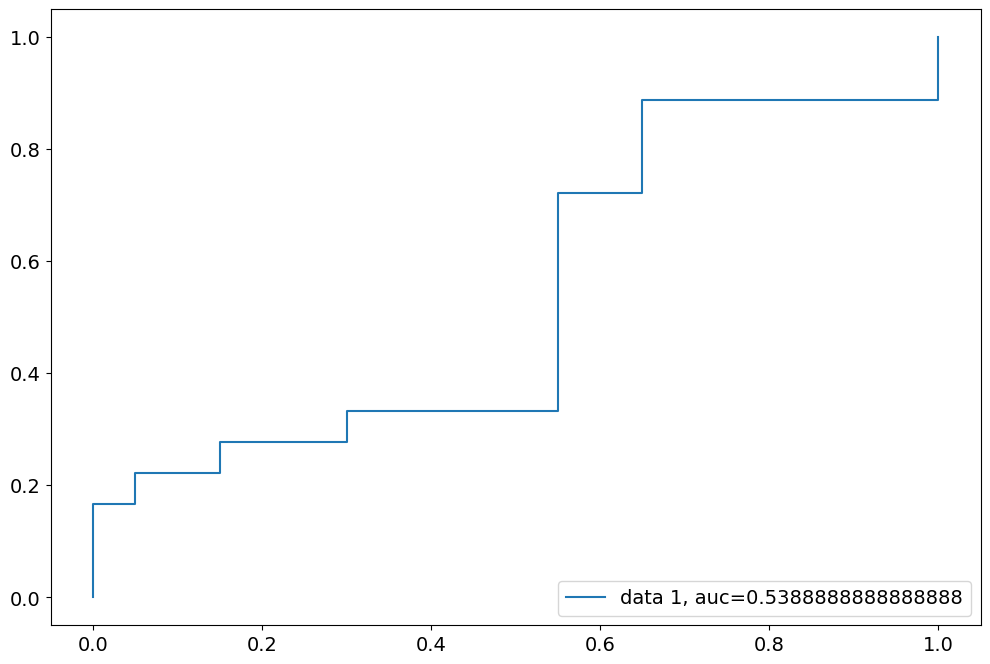

COH.A.delta.c.F7.d.F3
Accuracy: 0.5


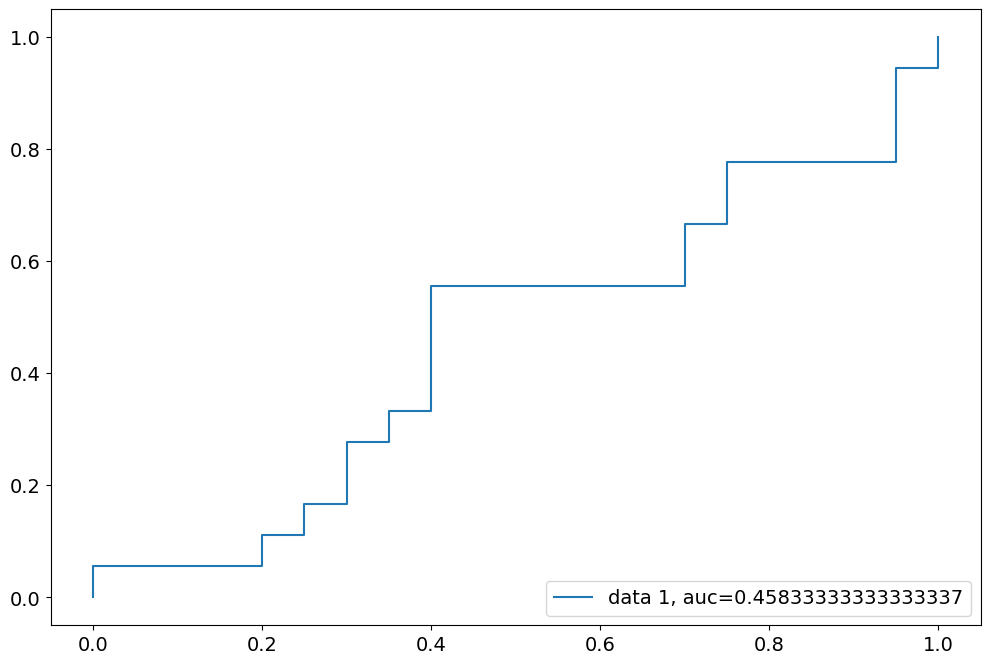

COH.A.delta.g.F8.i.C3
Accuracy: 0.5263157894736842


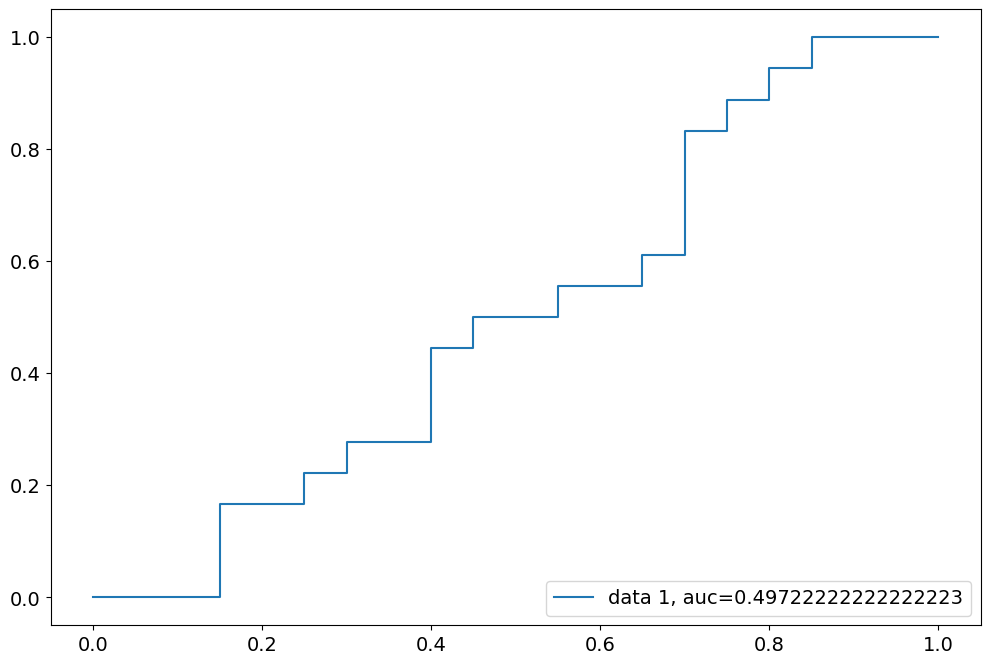

COH.A.delta.c.F7.i.C3
Accuracy: 0.47368421052631576


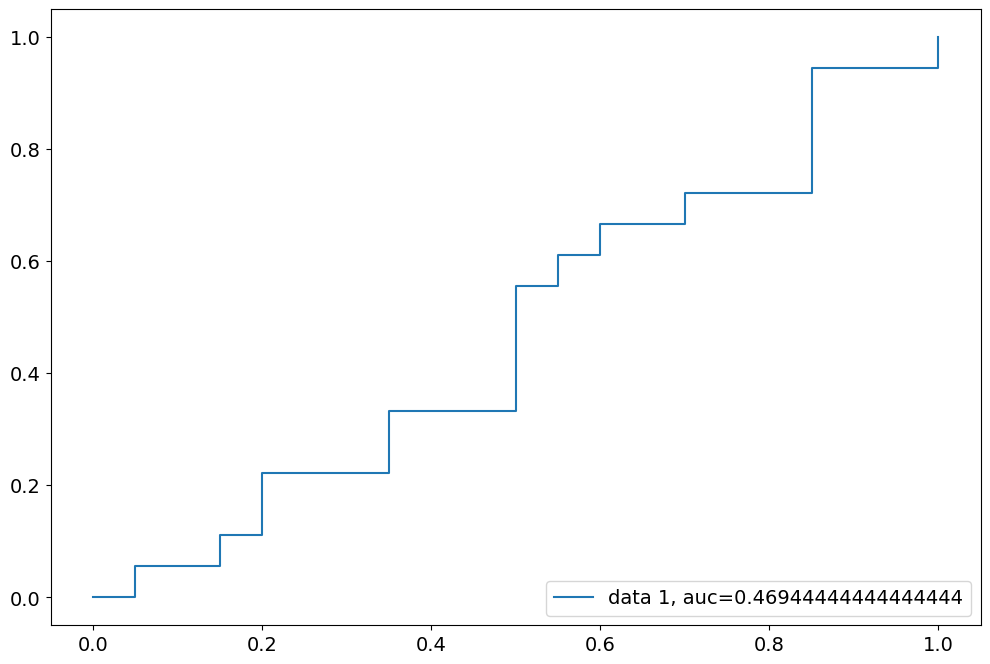

COH.A.delta.f.F4.q.T6
Accuracy: 0.5263157894736842


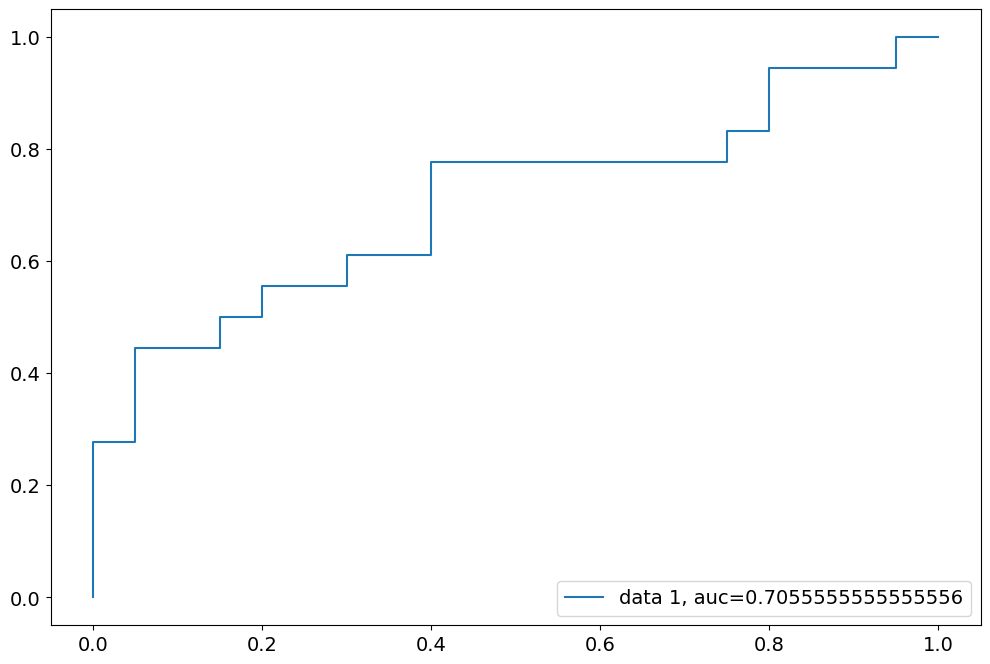

COH.A.delta.h.T3.o.Pz
Accuracy: 0.47368421052631576


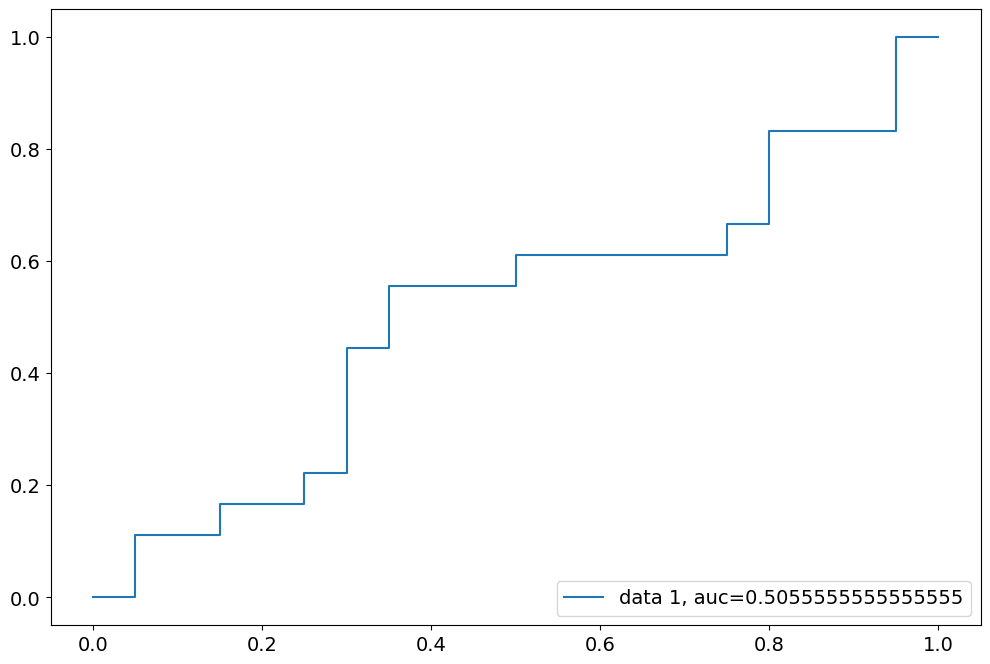

COH.A.delta.g.F8.q.T6
Accuracy: 0.42105263157894735


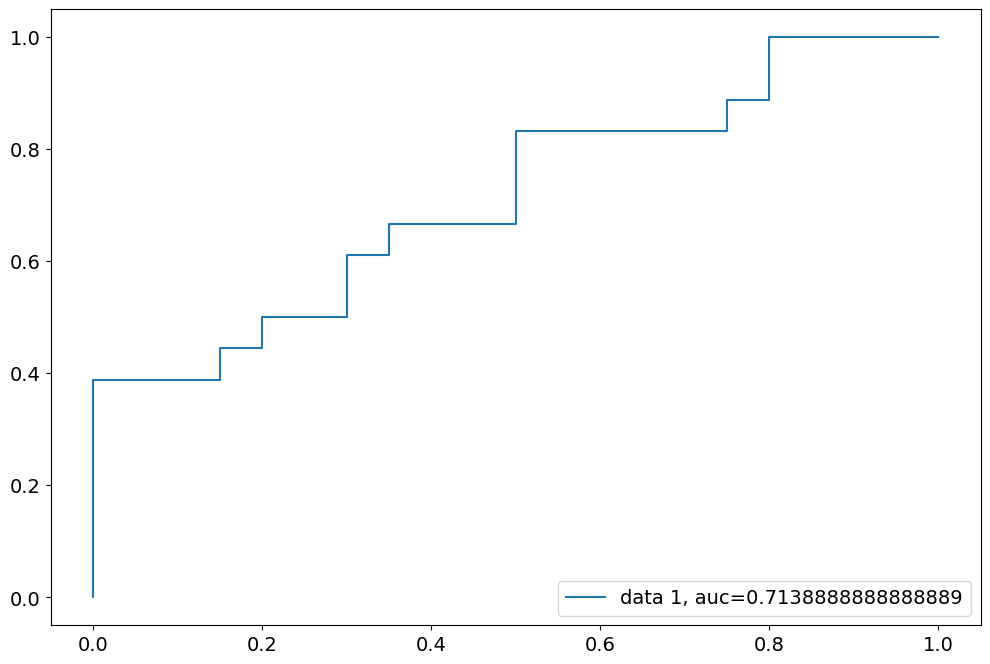

COH.A.delta.g.F8.l.T4
Accuracy: 0.5526315789473685


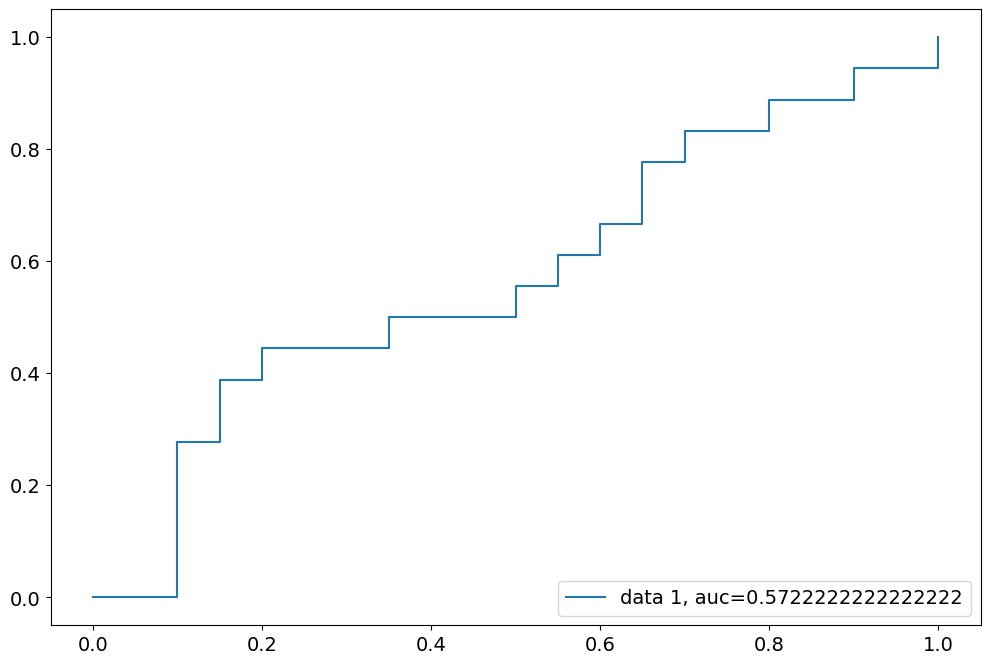

COH.A.delta.e.Fz.k.C4
Accuracy: 0.6052631578947368


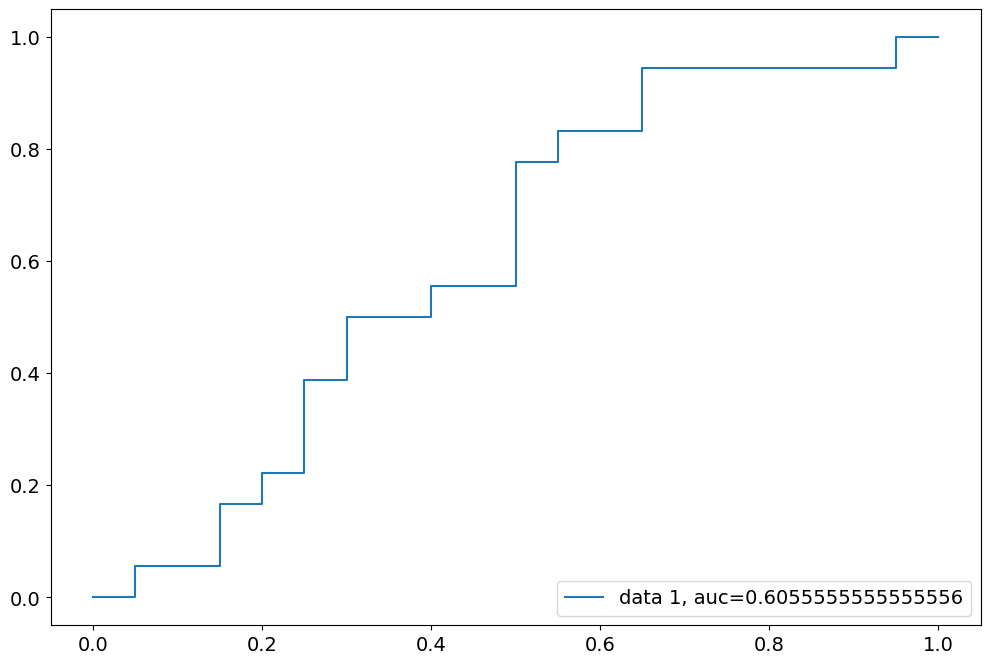

In [82]:
import random
random.seed(15)
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# Assuming 'top_15_features' is a DataFrame with columns 'feature' and 'importance'
# Iterate over the values in the 'feature' column
for feature in top_15_features['feature']:  # Access the 'feature' column
  print(feature)
  data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')
  Y = data1['specific_disorder']
  # Use the current feature for X
  X = data1[[feature]]

  Y=Y.astype('str')
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)


  # Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
  y_test_pred = clf.predict(X_test)

  print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

  logreg = LogisticRegression()
  #logreg.fit(X_train, y_train)
  logreg.fit(X, Y)

  y_pred_proba = logreg.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

In [83]:
data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')
Y = data1['specific_disorder']
X = data1[['COH.A.delta.f.F4.k.C4']]
#'COH.A.delta.a.FP1.g.F8', 'COH.A.delta.c.F7.d.F3', 'sex', 'age', 'COH.A.delta.c.F7.i.C3'
print(X)


     COH.A.delta.f.F4.k.C4
0                76.639834
1                68.864418
2                79.477142
3                78.541404
4                37.628818
..                     ...
183              66.991806
184              72.191418
185              51.064942
186              65.202604
187              60.873129

[188 rows x 1 columns]


In [84]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(38, 1)
(150,)
(38,)


In [85]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.5789473684210527


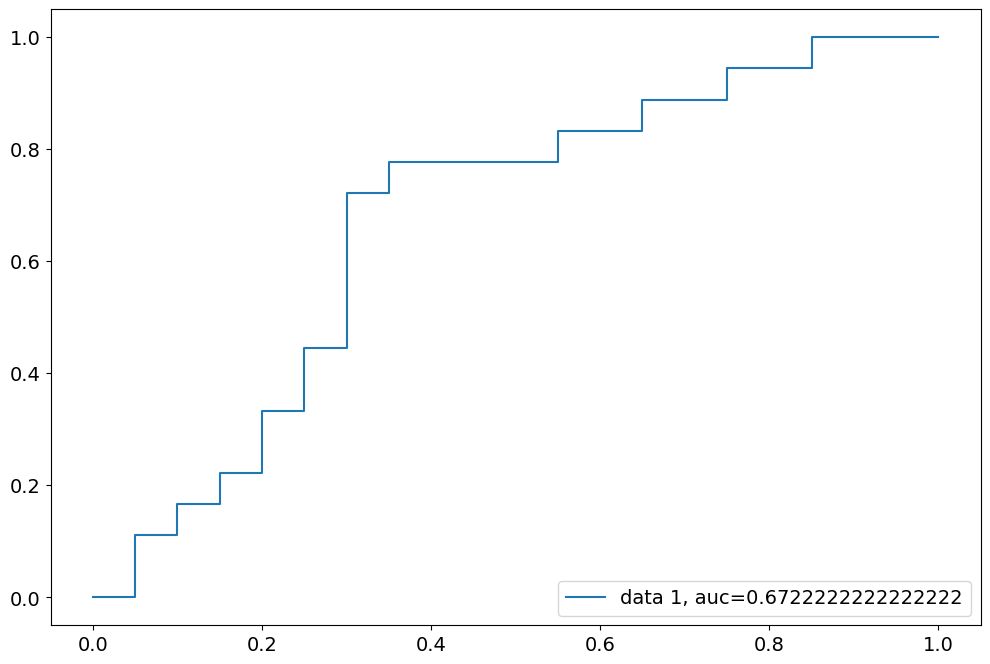

In [86]:

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [92]:
X = top_15_features['feature'].tolist()
X=data1[X]

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
print(X)
print(len(X))


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

     COH.A.delta.f.F4.k.C4  COH.A.delta.a.FP1.g.F8  COH.A.delta.a.FP1.h.T3  \
0                76.639834               51.937391               43.611160   
1                68.864418               31.445739               19.552409   
2                79.477142               52.457034               28.887044   
3                78.541404               69.483540               46.104637   
4                37.628818               61.467298               29.404801   
..                     ...                     ...                     ...   
183              66.991806               43.218549               34.752071   
184              72.191418               27.234749               17.694229   
185              51.064942               35.464644               44.471125   
186              65.202604               48.327899               38.699029   
187              60.873129               63.159951               12.283524   

       age  sex  COH.A.delta.e.Fz.f.F4  COH.A.delta.b.FP2.l.T4 

## `Age and Sex without EEG - Specific Disorder Prediction`

The higher prediction value when only using age and sex proves that the first model is taking eeg channels into account

In [ ]:
data1 = pd.read_csv('/content/NoEEG - only extras.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/NoEEG - only extras.csv'

In [ ]:
Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

In [ ]:
data = pd.DataFrame(data2)
X=data

Y
data

In [ ]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(38, 2)
(150,)
(38,)


In [ ]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7631578947368421


In [ ]:
#prediction after fixing class imbalance

from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, Y = oversampler.fit_resample(data2, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(152, 2)
(38, 2)
(152,)
(38,)
Accuracy: 0.7894736842105263


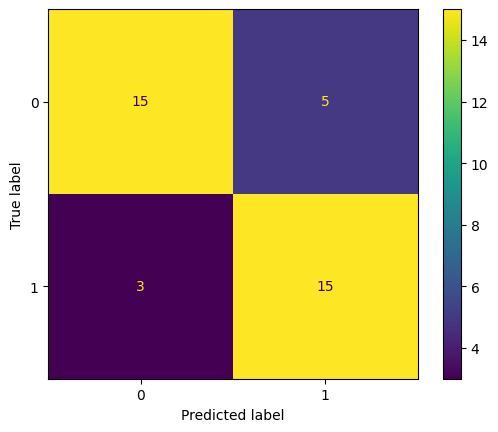

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

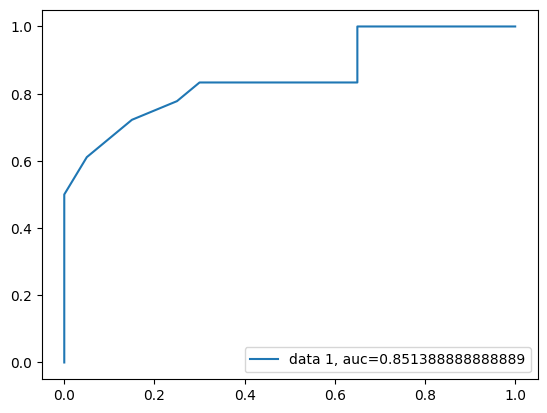

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

     COH.A.delta.f.F4.k.C4
0                76.639834
1                68.864418
2                79.477142
3                78.541404
4                37.628818
..                     ...
183              66.991806
184              72.191418
185              51.064942
186              65.202604
187              60.873129

[188 rows x 1 columns]
                            OLS Regression Results                            
Dep. Variable:      specific_disorder   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.289
Date:                Sat, 19 Oct 2024   Prob (F-statistic):             0.0130
Time:                        00:25:55   Log-Likelihood:                -133.31
No. Observations:                 188   AIC:                             270.6
Df Residuals:                     186   BIC:                             277.1
Df Model:           